# **Data Analysis**

## Objectives

* Explore data and identify variables that correlate highly with the target variable (Sale price)

## Inputs

* The cleaned dataset generated in Notebook 1

## Outputs

* 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-heritage-housing-issues'

Install requirements

In [5]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Section 1

Section 1 content

In [6]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_price_data.csv"))
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1460 non-null   float64
 2   BedroomAbvGr   1460 non-null   float64
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1460 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  1460 non-null   float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1460 non-null   object 
 10  GarageYrBlt    1460 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1460 non-null   float64
 15  MasVnrArea     1460 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

Convert each categorical value into a new numerical column, with a 1 or 0 value
This allows us to calculate the correlation for these variables

---

In [7]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(3)

(1460, 40)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,...,BsmtFinType1_BLQ,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_None,GarageFinish_Fin,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854.0,3.0,706,150,0.0,548,2003.0,1710,8450,...,0,0,1,0,0,0,1,0,0,0
1,1262,0.0,3.0,978,284,0.0,460,1976.0,1262,9600,...,0,0,1,0,0,0,0,1,0,0
2,920,866.0,3.0,486,434,0.0,608,2001.0,1786,11250,...,0,0,1,0,0,0,1,0,0,0


In [8]:
df.columns[df.dtypes=='object'].to_list()

['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

# Section 2

calculate correlation of each variable with the target variable (Sale price) using spearman and pearson methods

In [9]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649379
GarageYrBlt       0.634095
TotalBsmtSF       0.602725
KitchenQual_TA   -0.581803
1stFlrSF          0.575408
YearRemodAdd      0.571159
KitchenQual_Gd    0.478583
Name: SalePrice, dtype: float64

In [10]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.790982
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearBuilt         0.522897
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
MasVnrArea        0.472614
Name: SalePrice, dtype: float64

get the columns that are common to the top 10 of each method, resulting in 12 variables:

In [11]:
selected_variables = list(set(corr_pearson[:10].index.tolist() + corr_spearman[:10].index.tolist()))
selected_variables

['KitchenQual_Ex',
 'GarageArea',
 'KitchenQual_Gd',
 'MasVnrArea',
 'GrLivArea',
 '1stFlrSF',
 'YearRemodAdd',
 'TotalBsmtSF',
 'OverallQual',
 'KitchenQual_TA',
 'YearBuilt',
 'GarageYrBlt']

selected_variables output:
['YearRemodAdd',
 'KitchenQual_Ex',
 'GarageArea',
 'GarageYrBlt',
 'OverallQual',
 'MasVnrArea',
 'KitchenQual_Gd',
 '1stFlrSF',
 'KitchenQual_TA',
 'YearBuilt',
 'TotalBsmtSF',
 'GrLivArea']

 the above list is from the 'one hot encoder' dataset which was used to convert categrical variables to numerical for correlation calculation. Now that we know which categorical variables were highly correlated with the target variable we need to include the original variables in the final list. The only categorical variable is 'KitchenQual', so the final list is:

 ['YearRemodAdd',
 'GarageArea',
 'GarageYrBlt',
 'OverallQual',
 'MasVnrArea',
 '1stFlrSF',
 'KitchenQual',
 'YearBuilt',
 'TotalBsmtSF',
 'GrLivArea']

In [12]:
final_list = ['YearRemodAdd',
 'GarageArea',
 'GarageYrBlt',
 'OverallQual',
 'MasVnrArea',
 '1stFlrSF',
 'KitchenQual',
 'YearBuilt',
 'TotalBsmtSF',
 'GrLivArea']
df_eda = df.filter(final_list + ['SalePrice'])
df_eda.info()
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  1460 non-null   int64  
 1   GarageArea    1460 non-null   int64  
 2   GarageYrBlt   1460 non-null   float64
 3   OverallQual   1460 non-null   int64  
 4   MasVnrArea    1460 non-null   float64
 5   1stFlrSF      1460 non-null   int64  
 6   KitchenQual   1460 non-null   object 
 7   YearBuilt     1460 non-null   int64  
 8   TotalBsmtSF   1460 non-null   int64  
 9   GrLivArea     1460 non-null   int64  
 10  SalePrice     1460 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 125.6+ KB


numerical: YearRemodAdd


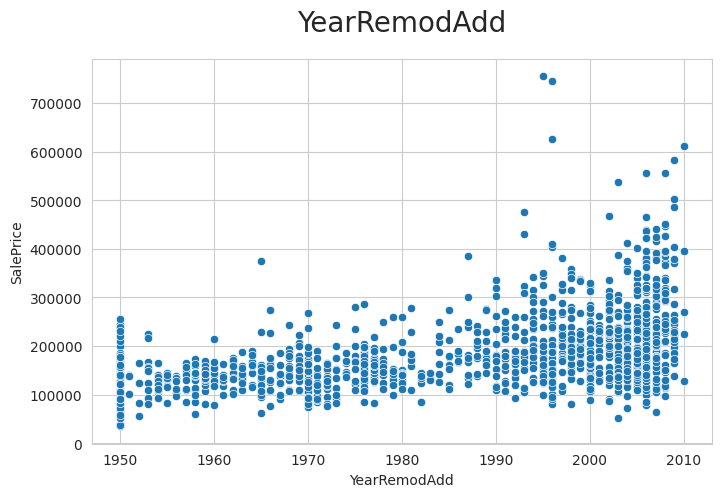




numerical: GarageArea


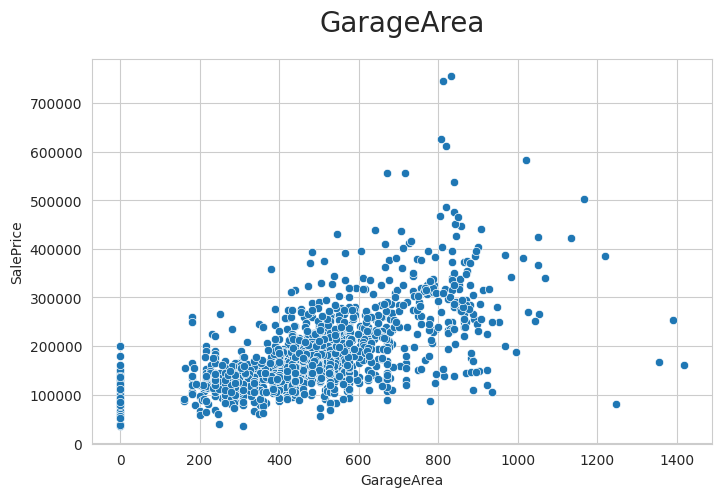




numerical: GarageYrBlt


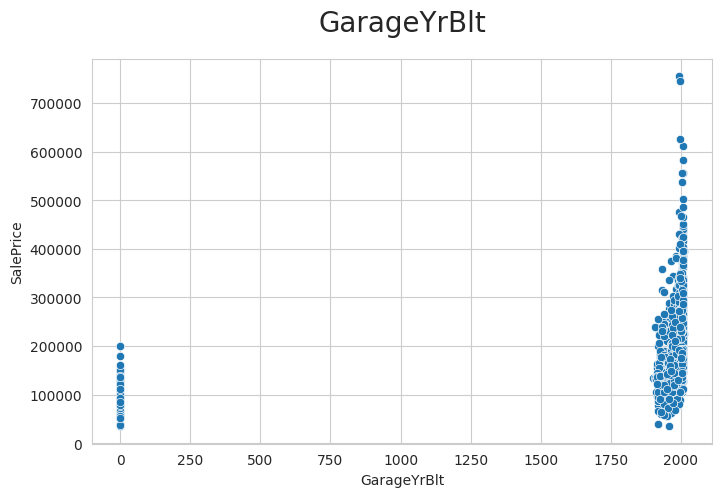




numerical: OverallQual


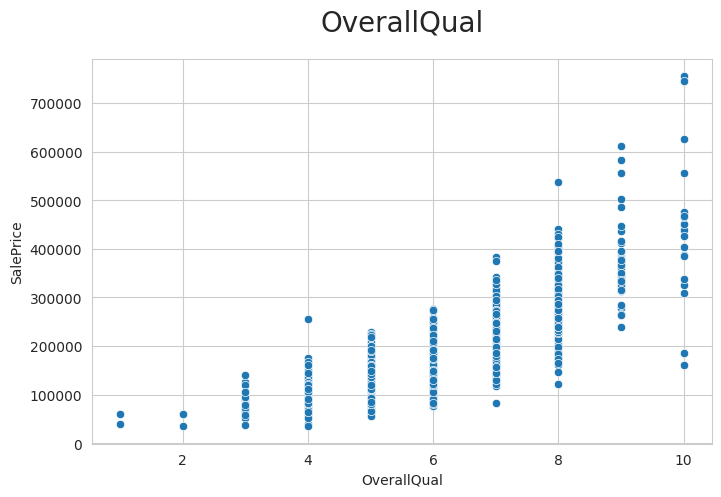




numerical: MasVnrArea


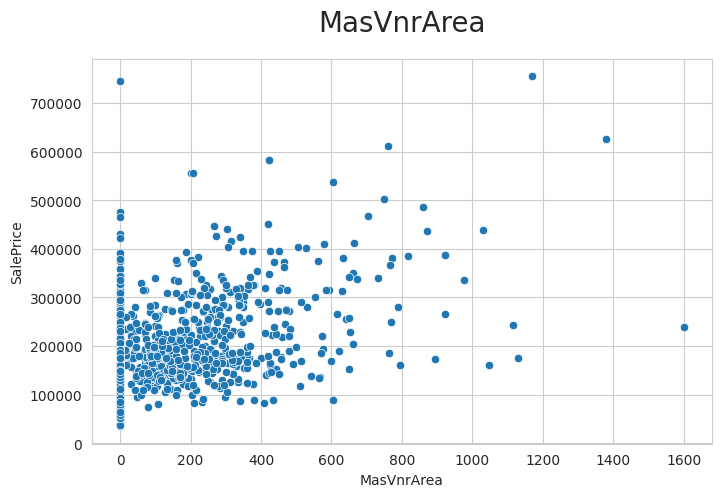




numerical: 1stFlrSF


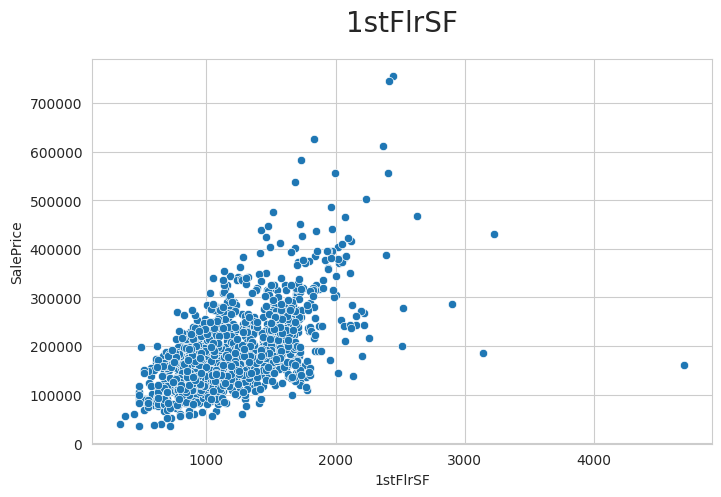




categorical: KitchenQual


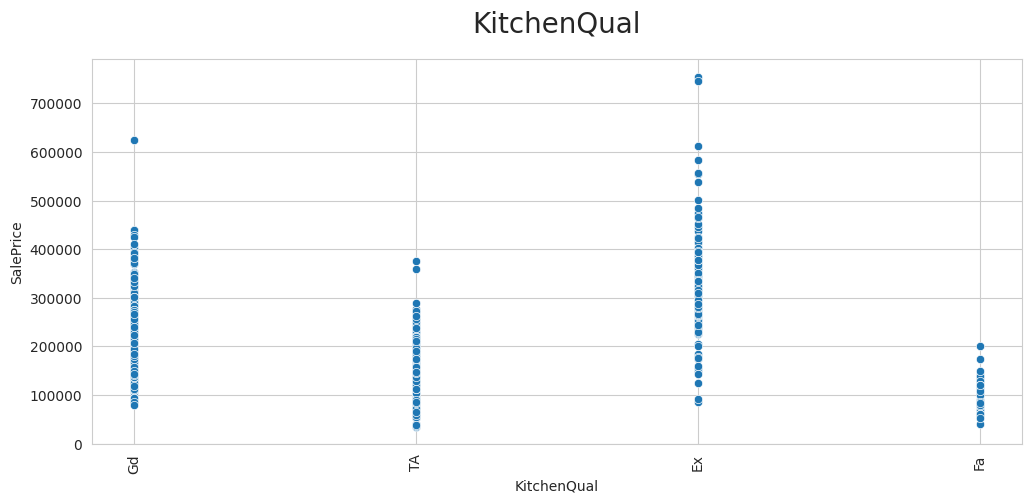




numerical: YearBuilt


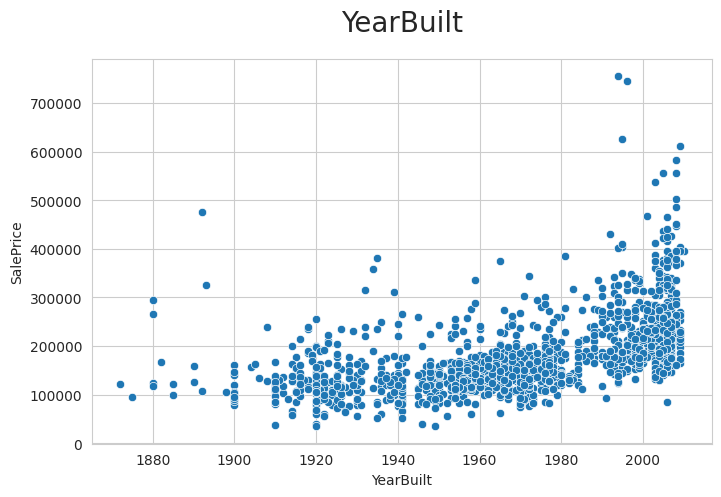




numerical: TotalBsmtSF


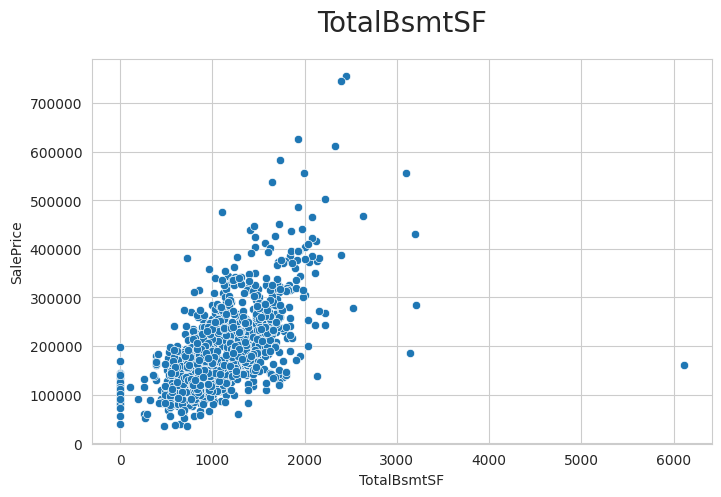




numerical: GrLivArea


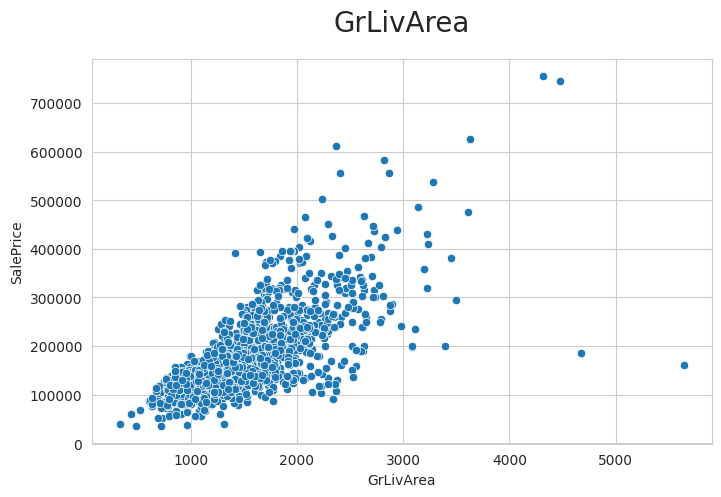

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.scatterplot(data=df, x=col, y=df[target_var])
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y=df[target_var])
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'SalePrice'
for col in final_list:
    if df_eda[col].dtype == 'object':
        print(f'categorical: {col}')
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        print(f'numerical: {col}')
        plot_numerical(df_eda, col, target_var)
        print("\n\n")

From the plots above we can see a strong positive correlation between the variables that measure the house/basement size (GrLivArea, TotalBsmtSF, 1stFlrSF, OverallQual, GarageArea), the variable that indicates the overall quality (OverallQual), and the target variable (salePrice). These variables are also among the variables most strongly correlated with the target variable, according to the pearson and spearman method calculations in the previous cells